In [150]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('_mpl-gallery')

In [19]:
# Read the median income data
median_income_csv = Path("/Users/akshaynyamala/Documents/Project_1/Median_income.csv")
median_income_df = pd.read_csv(median_income_csv)

In [20]:
median_income_df

,Years,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia
0,2006,50900.0,53400.0,52100.0,50900.0,51700.0,65700.0,54500.0,54900.0,75300.0,62400.0
1,2007,53600.0,55600.0,55000.0,53200.0,52500.0,67200.0,57700.0,58300.0,78700.0,63300.0
2,2008,54500.0,57100.0,53400.0,53600.0,51700.0,68100.0,60400.0,61700.0,81000.0,66400.0
3,2009,56400.0,57700.0,54100.0,54300.0,54200.0,68300.0,61300.0,62900.0,80900.0,64300.0
4,2010,57100.0,57900.0,54900.0,55700.0,53600.0,68000.0,61100.0,63300.0,79100.0,62800.0
5,2011,57400.0,56500.0,56500.0,55700.0,53800.0,67700.0,59800.0,66500.0,79700.0,63800.0
6,2012,59900.0,58900.0,57100.0,54900.0,55800.0,67500.0,61500.0,70000.0,86100.0,63700.0
7,2013,64700.0,58800.0,57300.0,55400.0,55000.0,66500.0,63700.0,71700.0,87500.0,66000.0
8,2014,66300.0,58800.0,57900.0,57500.0,56400.0,69000.0,63600.0,73900.0,88400.0,66200.0
9,2015,63500.0,60600.0,56300.0,58700.0,55400.0,70600.0,64200.0,72200.0,87900.0,67000.0


In [43]:
median_income_df.hvplot.line(x='Years', y=['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan','Alberta', 'British Columbia'], 
                value_label='Median incomes for Canada housholds from 2006 to 2020', legend='top', height=600, width=1000)

:NdOverlay   [Variable]
   :Curve   [Years]   (Median incomes for Canada housholds from 2006 to 2020)

In [56]:
# Read the median income data
Rental_data = Path("/Users/akshaynyamala/Documents/Project_1/rental price 2006 2020 canada.csv")


In [57]:
Rental_data_df = pd.read_csv(Rental_data)
Rental_data_df.head()

,Years,Vacancy Rate (%),Availability Rate (%),Average Rent,Median Rent,% Change,Units
0,2006,2.7,3.7,724,680,3.2,"1,883,719"
1,2007,2.7,3.7,746,700,3.7,"1,869,271"
2,2008,2.3,3.3,774,725,3.0,"1,822,495"
3,2009,3.1,4.3,782,740,2.3,"1,833,953"
4,2010,2.9,4,806,760,2.3,"1,833,329"


In [59]:
Rental_data_df.dtypes

Rental_data_df['Average Rent ($)'] = Rental_data_df['Average Rent'].astype(str).astype(int)

In [60]:
# Create a visual aggregation explore the average rental price change by year in Canada
Rental_data_df.hvplot.bar(y='Average Rent ($)', x = 'Years', 
                                 ylabel = 'Housing Units', 
                                 xlabel = 'Year',
                                 ylim=(650, 1200), 
                                 width = 600,
                                 height = 500,
                                 color = 'blue',
                                 label = 'average rental price change in Canada from 2006 to 2020'
                                ).opts(yformatter='%.0f')

:Bars   [Years]   (Average Rent ($))

In [112]:
#Calculating Price to rent ratio for a specific provinc

#initially joining the data sets

combined_df = pd.concat(
    [median_income_df, Rental_data_df], 
    axis="columns",
    sort=True
)

In [113]:
combined_df.head()

,Years,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Years,Vacancy Rate (%),Availability Rate (%),Average Rent,Median Rent,% Change,Units,Average Rent ($)
0,2006,50900.0,53400.0,52100.0,50900.0,51700.0,65700.0,54500.0,54900.0,75300.0,62400.0,2006,2.7,3.7,724,680,3.2,"1,883,719",724
1,2007,53600.0,55600.0,55000.0,53200.0,52500.0,67200.0,57700.0,58300.0,78700.0,63300.0,2007,2.7,3.7,746,700,3.7,"1,869,271",746
2,2008,54500.0,57100.0,53400.0,53600.0,51700.0,68100.0,60400.0,61700.0,81000.0,66400.0,2008,2.3,3.3,774,725,3.0,"1,822,495",774
3,2009,56400.0,57700.0,54100.0,54300.0,54200.0,68300.0,61300.0,62900.0,80900.0,64300.0,2009,3.1,4.3,782,740,2.3,"1,833,953",782
4,2010,57100.0,57900.0,54900.0,55700.0,53600.0,68000.0,61100.0,63300.0,79100.0,62800.0,2010,2.9,4,806,760,2.3,"1,833,329",806


In [119]:
Price_rent_df = pd.concat(
    [median_income_df, Rental_data_df], 
    join = "inner",
    sort = True
)
Price_rent_df.head()

,Years
0,2006
1,2007
2,2008
3,2009
4,2010


In [140]:
#defining variables for Ontario

Ontario_income = combined_df['Ontario']

Newfoundland_and_Labrador_income = combined_df['Newfoundland and Labrador']

Prince_Edward_Island_income = combined_df['Prince Edward Island']

Nova_Scotia_income = combined_df['Nova Scotia']

New_Brunswick_income = combined_df['New Brunswick']

Quebec_income = combined_df['Quebec']

Manitoba_income = combined_df['Manitoba']

Saskatchewan_income = combined_df['Saskatchewan']

Alberta_income = combined_df['Alberta']

British_Columbia_income = combined_df['British Columbia']

Average_rent = combined_df['Average Rent']*12

Ontario_ratio = Ontario_income/Average_rent

Newfoundland_and_Labrador_ratio = Newfoundland_and_Labrador_income/Average_rent

Prince_Edward_Island_ratio = Prince_Edward_Island_income/Average_rent

Nova_Scotia_ratio = Nova_Scotia_income/Average_rent

New_Brunswick_ratio = New_Brunswick_income/Average_rent

Quebec_ratio = Quebec_income/Average_rent

Manitoba_ratio = Manitoba_income/Average_rent

Saskatchewan_ratio = Saskatchewan_income/Average_rent

Alberta_ratio = Alberta_income/Average_rent

British_Columbia_ratio = British_Columbia_income/Average_rent

#adding the column to combined data

Price_rent_df['Ontario_ratio'] = Ontario_ratio

Price_rent_df['Newfoundland_and_Labrador_ratio'] = Newfoundland_and_Labrador_ratio

Price_rent_df['Prince_Edward_Island_ratio'] = Prince_Edward_Island_ratio

Price_rent_df['Nova_Scotia_ratio'] = Nova_Scotia_ratio

Price_rent_df['New_Brunswick_ratio'] = New_Brunswick_ratio

Price_rent_df['Quebec_ratio'] = Quebec_ratio

Price_rent_df['Manitoba_ratio'] = Manitoba_ratio

Price_rent_df['Saskatchewan_ratio'] = Saskatchewan_ratio

Price_rent_df['Alberta_ratio'] = Alberta_ratio

Price_rent_df['British_Columbia_ratio'] = British_Columbia_ratio


In [141]:
Price_rent_df.drop_duplicates()

,Years,Price_to_rent_ratio,Ontario_ratio,Newfoundland_and_Labrador_ratio,Prince_Edward_Island_ratio,Nova_Scotia_ratio,New_Brunswick_ratio,Quebec_ratio,Manitoba_ratio,Saskatchewan_ratio,Alberta_ratio,British_Columbia_ratio
0,2006,7.562155,7.562155,5.858656,6.146409,5.996777,5.858656,5.950737,6.273020,6.319061,8.667127,7.182320
1,2007,7.506702,7.506702,5.987489,6.210903,6.143878,5.942806,5.864611,6.445487,6.512511,8.791332,7.071046
2,2008,7.332041,7.332041,5.867786,6.147717,5.749354,5.770887,5.566322,6.503015,6.642980,8.720930,7.149009
3,2009,7.278346,7.278346,6.010230,6.148764,5.765132,5.786445,5.775789,6.532396,6.702899,8.621057,6.852089
4,2010,7.030604,7.030604,5.903639,5.986352,5.676179,5.758892,5.541770,6.317204,6.544665,8.178246,6.492969
5,2011,6.830105,6.830105,5.790960,5.700161,5.700161,5.619451,5.427764,6.033091,6.709040,8.040759,6.436642
6,2012,6.664692,6.664692,5.914297,5.815561,5.637836,5.420616,5.509479,6.072275,6.911532,8.501185,6.289494
7,2013,6.428848,6.428848,6.254834,5.684455,5.539443,5.355762,5.317092,6.158159,6.931555,8.459010,6.380510
8,2014,6.511891,6.511891,6.257078,5.549264,5.464326,5.426576,5.322763,6.002265,6.974330,8.342771,6.247641
9,2015,6.486586,6.486586,5.834252,5.567806,5.172731,5.393238,5.090040,5.898567,6.633591,8.076075,6.155825


In [164]:
Price_rent_df.head()

,Years,Price_to_rent_ratio,Ontario_ratio,Newfoundland_and_Labrador_ratio,Prince_Edward_Island_ratio,Nova_Scotia_ratio,New_Brunswick_ratio,Quebec_ratio,Manitoba_ratio,Saskatchewan_ratio,Alberta_ratio,British_Columbia_ratio
0,2006,7.562155,7.562155,5.858656,6.146409,5.996777,5.858656,5.950737,6.273020,6.319061,8.667127,7.182320
1,2007,7.506702,7.506702,5.987489,6.210903,6.143878,5.942806,5.864611,6.445487,6.512511,8.791332,7.071046
2,2008,7.332041,7.332041,5.867786,6.147717,5.749354,5.770887,5.566322,6.503015,6.642980,8.720930,7.149009
3,2009,7.278346,7.278346,6.010230,6.148764,5.765132,5.786445,5.775789,6.532396,6.702899,8.621057,6.852089
4,2010,7.030604,7.030604,5.903639,5.986352,5.676179,5.758892,5.541770,6.317204,6.544665,8.178246,6.492969


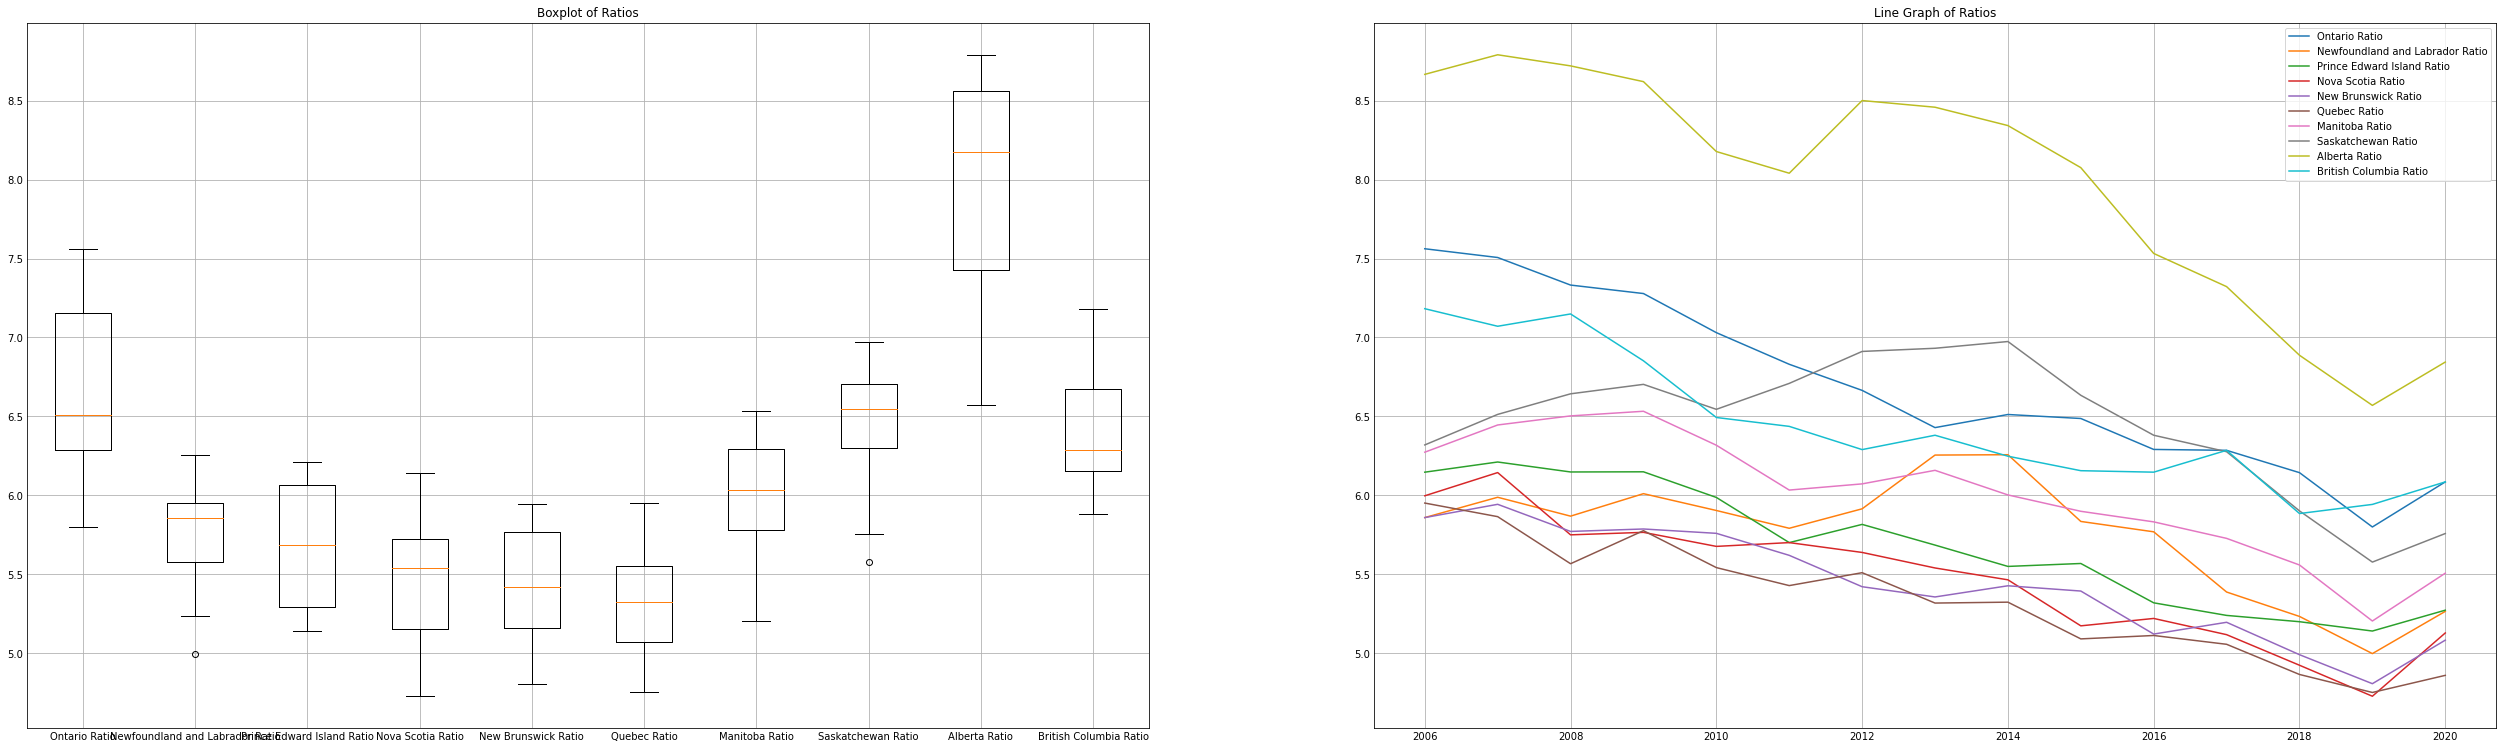

In [171]:
years = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
ontario_ratio = [7.562155,7.506702,7.332041,7.278346,7.030604,6.830105,6.664692,6.428848,6.511891,6.486586,6.290497,6.284868,6.143430,5.799174,6.084777]
newfoundland_and_labrador_ratio = [5.858656,5.987489,5.867786,6.010230,5.903639,5.790960,5.914297,6.254834,6.257078,5.834252,5.768539,5.387029,5.232364,4.996822,5.264357]
prince_edward_island_ratio = [6.146409,6.210903,6.147717,6.148764,5.986352,5.700161,5.815561,5.684455,5.549264,5.567806,5.318575,5.238842,5.198930,5.139816,5.271954]
nova_scotia_ratio = [5.996777,6.143878,5.749354,5.765132,5.676179,5.700161,5.637836,5.539443,5.464326,5.172731,5.219582,5.116806,4.923103,4.726724,5.127621]
new_brunswick_ratio = [5.858656,5.942806,5.770887,5.786445,5.758892,5.619451,5.420616,5.355762,5.426576,5.393238,5.120590,5.195258,4.989970,4.806165,5.082042]
quebec_ratio = [5.950737,5.864611,5.566322,5.775789,5.541770,5.427764,5.509479,5.317092,5.322763,5.090040,5.111591,5.055788,4.864594,4.750556,4.858960]
manitoba_ratio = [6.273020,6.445487,6.503015,6.532396,6.317204,6.033091,6.072275,6.158159,6.002265,5.898567,5.831533,5.726987,5.558342,5.203368,5.506370]
saskatchewan_ratio = [6.319061,6.512511,6.642980,6.702899,6.544665,6.709040,6.911532,6.931555,6.974330,6.633591,6.380490,6.276151,5.901036,5.576740,5.757626]
alberta_ratio = [8.667127,8.791332,8.720930,8.621057,8.178246,8.040759,8.501185,8.459010,8.342771,8.076075,7.532397,7.322176,6.887329,6.569749,6.844253]
british_columbia_ratio = [7.182320,7.071046,7.149009,6.852089,6.492969,6.436642,6.289494,6.380510,6.247641,6.155825,6.146508,6.284868,5.884320,5.942167,6.084777]

# Create a figure with two subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 10))

# First subplot
ax[0].boxplot([ ontario_ratio, newfoundland_and_labrador_ratio, prince_edward_island_ratio, nova_scotia_ratio, new_brunswick_ratio, quebec_ratio, manitoba_ratio, saskatchewan_ratio, alberta_ratio, british_columbia_ratio], labels=['Ontario Ratio', 'Newfoundland and Labrador Ratio', 'Prince Edward Island Ratio', 'Nova Scotia Ratio', 'New Brunswick Ratio', 'Quebec Ratio', 'Manitoba Ratio', 'Saskatchewan Ratio', 'Alberta Ratio', 'British Columbia Ratio'])
ax[0].set_title('Boxplot of Ratios')

# Second subplot
ax[1].plot(years, ontario_ratio, label='Ontario Ratio')
ax[1].plot(years, newfoundland_and_labrador_ratio, label='Newfoundland and Labrador Ratio')
ax[1].plot(years, prince_edward_island_ratio, label='Prince Edward Island Ratio')
ax[1].plot(years, nova_scotia_ratio, label='Nova Scotia Ratio')
ax[1].plot(years, new_brunswick_ratio, label='New Brunswick Ratio')
ax[1].plot(years, quebec_ratio, label='Quebec Ratio')
ax[1].plot(years, manitoba_ratio, label='Manitoba Ratio')
ax[1].plot(years, saskatchewan_ratio, label='Saskatchewan Ratio')
ax[1].plot(years, alberta_ratio, label='Alberta Ratio')
ax[1].plot(years, british_columbia_ratio, label='British Columbia Ratio')
ax[1].set_title('Line Graph of Ratios')
ax[1].legend()

plt.show()